# This is the project for analyzing sales of the company



In [64]:
import matplotlib.pyplot as plt
import os
import pandas as pd
from sklearn.linear_model import LinearRegression
from itertools import combinations
import numpy as np
from collections import Counter


In [2]:
os.chdir("files")
os.listdir()
files=[file for file in os.listdir()]
files

['allfile.csv',
 'Sales_April_2019.csv',
 'Sales_August_2019.csv',
 'Sales_December_2019.csv',
 'Sales_February_2019.csv',
 'Sales_January_2019.csv',
 'Sales_July_2019.csv',
 'Sales_June_2019.csv',
 'Sales_March_2019.csv',
 'Sales_May_2019.csv',
 'Sales_November_2019.csv',
 'Sales_October_2019.csv',
 'Sales_September_2019.csv']

In [3]:
allfile=pd.DataFrame()
for file in files:
    df=pd.read_csv(file)
    allfile=pd.concat([allfile,df])
allfile.shape
allfile.to_csv("allfile.csv",index=False)

In [4]:
df=pd.read_csv('allfile.csv')
df=df.copy(deep=False)

In [5]:
df.columns


Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address'],
      dtype='object')

In [6]:
cols=df.columns
df=df.dropna(how='any')#drop any rows having one or more nan values
df['month']=df[cols[4]].str[:2]
df['month'].unique
#df['month']=df['month'].astype('int32')
df=df[df['month']!='Or']
df['month']=df['month'].astype('int32')

## ANALYZING AT WHAT MONTH THE SALES WAS HIGH


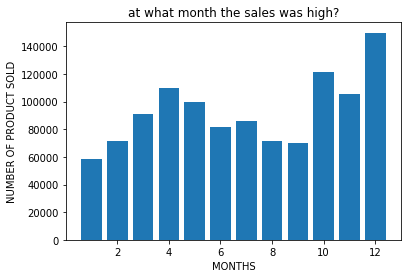

In [7]:
# high sales month
tempdic={}
for x in df['month'].unique():
    tempdic[x]=0
for x in df['month']:
    for y in tempdic:
        if x==y:
            tempdic[x]+=1
plt.bar(tempdic.keys(),tempdic.values())
plt.ylabel("NUMBER OF PRODUCT SOLD")
plt.xlabel("MONTHS")
plt.title('at what month the sales was high?')
plt.show()

## ANALYZING AT WHAT TIME THE SALES WAS HIGH SO THAT THEY COULD DISPLAY THE ADS TO INCREASE THE SALES

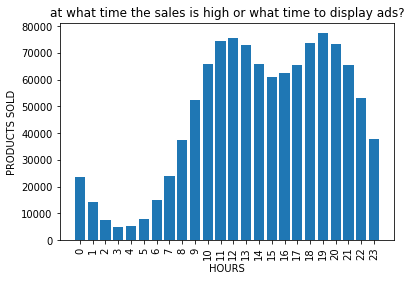

In [8]:
df['time']=df[cols[4]].str.split(' ').str[1]
df['time']=df['time'].str.split(':').str[0]
df['time']=df['time'].astype('int32')
tempdic={}
for x in df['time'].unique():
    tempdic[int(x)]=0
for x in df['time']:
    for y in tempdic:
        if int(x)==int(y):
            tempdic[x]+=1
plt.bar(tempdic.keys(),tempdic.values())
plt.title('at what time the sales is high or what time to display ads?')
plt.xticks(rotation=90)
plt.xticks(list(range(24)))
plt.xlabel("HOURS")
plt.ylabel("PRODUCTS SOLD")
plt.show()


## ANALYZING FROM WHICH LOCATIONS THE USERS ARE COMMING FROM

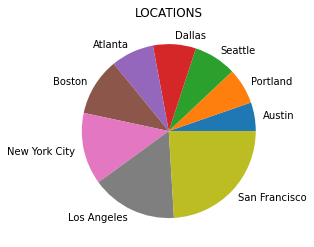

In [9]:
df['location']=df[cols[5]]
df['location']=df['location'].astype(str)
df['location']=df['location'].str.split(',').str[1].copy()
tempdic={}
for x in df['location']:
    if x.strip() in tempdic:
        tempdic[x.strip()]+=1
    else:
        tempdic[x.strip()]=0
location=tempdic.keys()
values=tempdic.values()
zipl=zip(location,values)
zipl=sorted(zipl,key=lambda a:a[1])
location=[item[0] for item in zipl]
values=[item[1] for item in zipl]
plt.pie(values,labels=location)
plt.title('LOCATIONS')
plt.show()

## ANALYZING WHAT PRODUCTS ARE SOLED AND AT WHAT QUANTITY


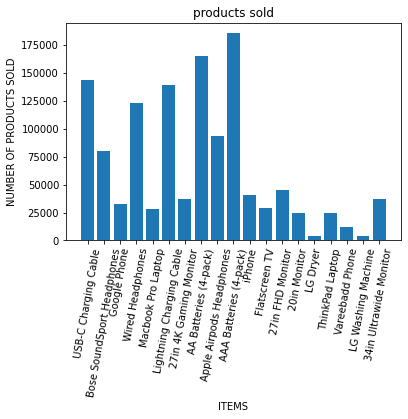

In [10]:
tempdic={}
for x in df[cols[1]].unique():
    tempdic[x.strip()]=0
df[cols[2]]=df[cols[2]].astype('int32')
for x in range(len(df[cols[1]])):
    try:
        if df[cols[1]][x] in tempdic:
            tempdic[df[cols[1]][x]]+=df[cols[2]][x]
    except Exception:pass
        
plt.bar(tempdic.keys(),tempdic.values())
plt.title('products sold')
plt.xlabel("ITEMS")
plt.ylabel("NUMBER OF PRODUCTS SOLD")
plt.xticks(rotation=80)
plt.show()

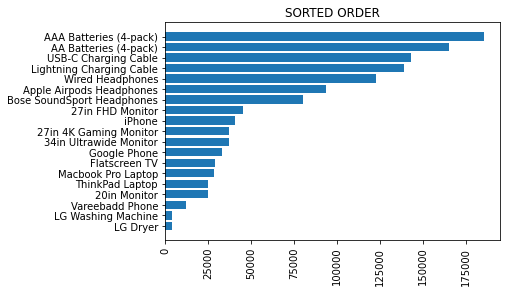

In [11]:
zipl=zip(tempdic.keys(),tempdic.values())
zipl=sorted(zipl,key=lambda a:a[1])
item=[item[0] for item in zipl]
sales=[item[1] for item in zipl]
plt.barh(item,width=sales)
plt.title('SORTED ORDER')
plt.xticks(rotation=90)
plt.show()

## FETCHING THE PRODUCT RATES

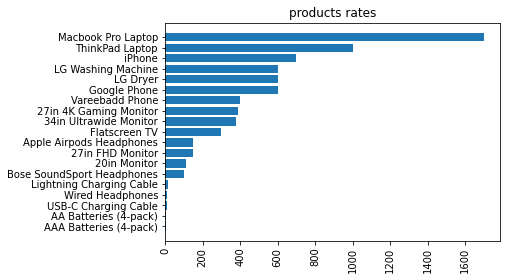

In [12]:
try:
    tempdic={}
    for x in range(len(df[cols[1]])):
        if x==1:pass
        else:
            tempdic[df[cols[1]][x]]=df[cols[3]][x]
except Exception :pass
for x in tempdic:
    tempdic[x]=float(tempdic[x])
zipl=zip(tempdic.keys(),tempdic.values())
zipl=sorted(zipl,key=lambda a:a[1])
item=[item[0] for item in zipl]
rates=[item[1] for item in zipl]
plt.barh(item,width=rates)
plt.title('products rates')
plt.xticks(rotation=90)
plt.show()


## ANALYZING WHAT COMBINATIONS OF PRODUCT USER PURCHASED TO GETHER SO THAT THEY CAN BE PLACED TOGETHER IN THE FUTURE FOR BETTER SALES


In [13]:
data=df[df[cols[0]].duplicated(keep=False)]
data['grouped']=data.groupby(cols[0])[cols[1]].transform(lambda x:','.join(x))
data=data[[cols[0],'grouped']].drop_duplicates()
count=Counter()
print("THE COMBINATIONS OF ITEMS PEOPLE PERCHASED TOGETHER ")
for row in data['grouped']:
    rowlist=row.split(',')
    count.update(Counter(combinations(rowlist,2)))
for row,col in count.most_common(10):
    print(row,col)
    
    

THE COMBINATIONS OF ITEMS PEOPLE PERCHASED TOGETHER 
('USB-C Charging Cable', 'USB-C Charging Cable') 330273
('Lightning Charging Cable', 'Lightning Charging Cable') 326814
('AAA Batteries (4-pack)', 'AAA Batteries (4-pack)') 311343
('AA Batteries (4-pack)', 'AA Batteries (4-pack)') 309915
('Wired Headphones', 'Wired Headphones') 284490
('Apple Airpods Headphones', 'Apple Airpods Headphones') 234099
('Bose SoundSport Headphones', 'Bose SoundSport Headphones') 200847
('27in FHD Monitor', '27in FHD Monitor') 112929
('iPhone', 'iPhone') 102702
('27in 4K Gaming Monitor', '27in 4K Gaming Monitor') 93630


## COMBINING BOTH PRICE AND QUANTITY FOR BETTER UNDERSTANDING

C:\Users\Nagasheshu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\ipykernel_launcher.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator


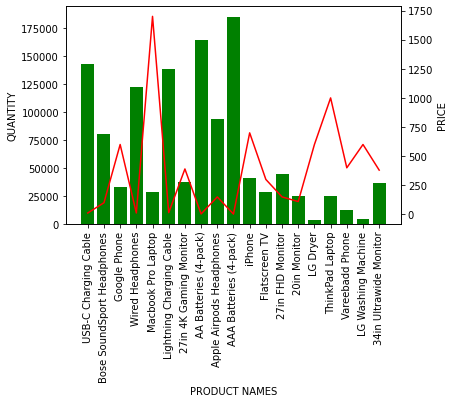

In [14]:
tempdic={}
for x in df[cols[1]].unique():
    tempdic[x.strip()]=0
df[cols[2]]=df[cols[2]].astype('int32')
for x in range(len(df[cols[1]])):
    try:
        if df[cols[1]][x] in tempdic:tempdic[df[cols[1]][x]]+=df[cols[2]][x]
    except Exception:pass
try:
    temp={}
    for x in range(len(df[cols[1]])):
        if x==1:pass
        else:temp[df[cols[1]][x]]=df[cols[3]][x]
except Exception :pass
for x in temp:
    temp[x]=float(temp[x])
fig,a1=plt.subplots()
a2=a1.twinx()
a1.bar(tempdic.keys(),tempdic.values(),color='green')
a2.plot(temp.keys(),temp.values(),color='red')
a1.set_xlabel('PRODUCT NAMES')
a1.set_ylabel('QUANTITY')
a2.set_ylabel('PRICE')
a1.set_xticklabels(temp.keys(),rotation=90)
plt.show()

## SALES FORCAST FOR NEXT 30 DAYS

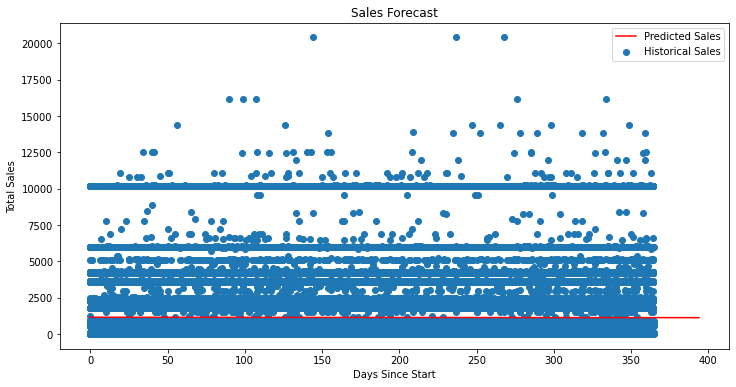

In [70]:
data=df[df[cols[0]].duplicated(keep=False)]
data['grouped'] = data.groupby(cols[0])[cols[3]].transform(lambda x: sum(float(val) for val in x))
data=data[[cols[0],'grouped']].drop_duplicates()
data['order_date'] = pd.to_datetime(df['Order Date'])
data['sincestart'] = (data['order_date'] - data['order_date'].min()).dt.days
x = data['sincestart'].values.reshape(-1, 1) 
y = data['grouped'].values  
model = LinearRegression()
model.fit(x, y)
future_days = np.arange(np.maximum(data['sincestart'].max() + 1, data['sincestart'].max() + 30))
future_sales = model.predict(future_days.reshape(-1, 1))
plt.figure(figsize=(12, 6))
plt.scatter(data['sincestart'] , data['grouped'], label='Historical Sales')
plt.plot(future_days, future_sales, label='Predicted Sales', color='red')
plt.title('Sales Forecast')
plt.xlabel('Days Since Start')
plt.ylabel('Total Sales')
plt.legend()
plt.show()